# HW 9 - Investigating Chaotic systems with python


## Excercise 1

Recall the Holling-Tanner Model of an ecological system

*Plants*  
$\dot{x} = x(1-x) - \frac{a_1x}{1+b_1x}y$  

*Herbivores*  
$\dot{y} = \frac{a_1x}{1+b_1x}y - d_1y-\frac{a_2y}{1+b_2y}z$  

*Carnivores*  
$\dot{z} = \frac{a_2y}{1+b_2y}z - d_2z$


Simulate these equations for at least two sets of initial conditions that are less than 1% apart using the following parameters  
`a1 = 5`  
`b1 = 3`  
`a2 = 0.1`  
`b2 = 2`  
`d1 = 0.4`  
`d2 = 0.01`  

Plot the results as both a time series and trajectories. What eventually happens to the trajectories?

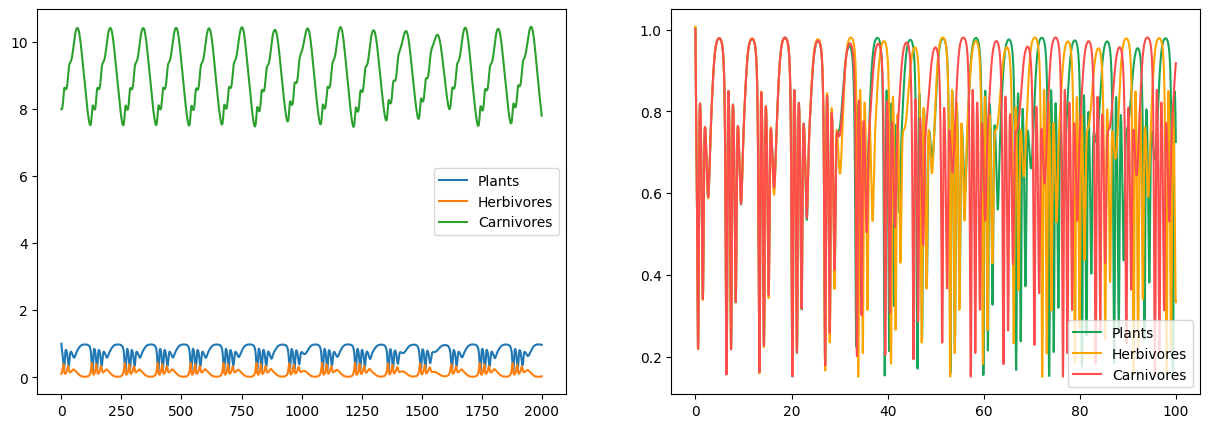

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def HT(state, t0, a1 = 5, a2 = 0.1, b1 = 3, b2 = 2, d1 = 0.4, d2 = 0.01):

    x = state[0]
    y = state[1]
    z = state[2]

    dxdt = x * (1 - x) - ((a1 * x)/(1 + (b1 * x))) * y
    dydt = (((a1 * x)/(1 + (b1 * x))) * y) - (d1 * y) - ((a2 * y)/(1 + (b2 * y))) * z
    dzdt = (((a2 * y)/(1 + (b2 * y))) * z) - (d2 * z)

    return [dxdt, dydt, dzdt]


t = np.linspace(0, 2000, 100000)
state0 = np.array([1, 0.1, 8])
state = odeint(HT, state0, t)



fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(t, state)
axes[0].legend(('Plants', 'Herbivores', 'Carnivores'))



N_trajectories = 3
t2 = np.linspace(0, 100, 100000)
state0 = np.array([1, 0.1, 8]) + 0.01*np.random.random((N_trajectories, 3))
state = np.asarray([odeint(HT, state0i, t)
                    for state0i in state0])

colors = ['#18A558', '#FFA500', '#FF4C4C']
for i in range(N_trajectories):
    axes[1].plot(t2, state[i, :, 0], color=colors[i])
axes[1].legend(('Plants', 'Herbivores', 'Carnivores'))
plt.show()



## Excercise 2
Recall that the concept of "sensitivity to initial conditions" can be given a precise definition.

Suppose $m_0$ and $n_0$ are two sets of initial conditions for the Holling-Tanner system and $d(m_0,n_0)$ is the distance between those points.

In the Holling-Tanner system $m_0$ and $n_0$ are points in 3-dimensional space, so the distance between them can be calculated using the standard formula for Euclidean distance:

$d(m,n) = \sqrt{(x_m-x_n)^2+(y_m-y_n)^2+(z_m-z_n)^2}$

After time $t$ the points $m_0$ and $n_0$ have been integrated to $m_t$ and $n_t$. Sensitivity dependance says that $d(m_t, n_t)$ grows exponentially with time with different levels of sensitivity being associated with different values of the lyapunov exponentn $\lambda$, such that  

$d(m_t, n_t) = e^{\lambda t}d(m_0,n_0)$  

Approximate the lyapunov exponent for the Holling-Tanner system using the parameters from Excercise 1. Show your work. 

## Excercise 3

Plot the Lorenz Map of the herbivores in the Holling-Tanner system using the abovementioned parameters.  

What happens at an Nth peak height of ~0.29? What does it represent?



## Excercise 4 (Extra Credit)
Demonstrate and explain why chaos can only occur in a 3D system. 
Show what you would have to do to the FitzHugh Nagumo System to bring it into a chaotic regime.
What are the tradeoffs between for an open system that must be functional (e.g. something in biology) in being almost but not quite chaotic as it approaches a parameter set that gives a lyapunov coefficient greater than 0.

Who did you work with: